# Nonlinear transfer function

__Linear approximation of nonlinear transfer function__. The response of a temperature sensor is given as

$$R(T)=R_{0}e^{\beta(\frac{1}{T}-\frac{1}{T_{0}})} \enspace[\Omega]$$

where $R_{0}$ is the resistance of the sensor at temperature $T_{0}$ and $\beta$ is a constant that depends on the material of the sensor. $T_{0}=20^{\circ}C$. Temperatures $T$ and $T_{0}$ are in K. Given: R(T)=1000 $\Omega$ at 25$^{\circ}$C and 3000 $\Omega$ at 0 $^{\circ}$C. The sensor is intended for use between  -45 $^{\circ}$C and 120 $^{\circ}$C.

a. Evaluate $\beta$ for this sensor and plot the sensor transfer function for the intended span.
 
b. Approximate the transfer function as a straight line connecting the end points and calculate the maximum error expected as a percentage of full scale.
 
c. Approximate the transfer function as a linear least squares approximation and calculate the maximum error expected as a percentage of full scale.

### Solution

a. Evaluate $\beta$ for this sensor and plot the sensor transfer function for the intended span.

Taking the two points that the problem gives us.

$$R_{0} =\, ? \, \longrightarrow T_{0} = 293,15\ ^{\circ}K$$ 

$$R_{1} = 1000\ \Omega \, \longrightarrow T_{1} = 298,15\ ^{\circ}K$$

$$R_{2} = 3000\ \Omega \, \longrightarrow T_{2} = 273,15\ ^{\circ}K$$

Taking the general equation of the temperature sensor and evaluating at the first given points $(T_{1},R_{1})$.

$$\frac{1}{e^{\beta\big(\frac{1}{T_{1}}-\frac{1}{T_{0}}\big)}} = \frac{R_{0}}{R_{1}}\enspace (2)$$

Due to it does not have a value for $R_{0}$, to find the value of $\beta$, it has to be expressed in terms of $(T_{1},R_{1})$ and $(T_{2},R_{2})$.

So, taking the general equation and evaluating at the second given point, to express $R_{0}$ in function of $R_{2}$. You get that,

$$R_{0} = \frac{R_{2}}{e^{\beta\big(\frac{1}{T_{2}}-\frac{1}{T_{0}}\big)}} = \enspace (3)$$

Now, replacing equation (3) into equation (2), you have,

$$\frac{R_{2}}{R_{1}} = \frac{e^{\beta\big(\frac{1}{T_{2}}-\frac{1}{T_{0}}\big)}}{e^{\beta\big(\frac{1}{T_{1}}-\frac{1}{T_{0}}\big)}} = e^{\beta\big[\big(\frac{1}{T_{2}}-\frac{1}{T_{0}}\big)-\big(\frac{1}{T_{1}}-\frac{1}{T_{0}}\big)\big]} \enspace (4)$$

Finally,

$$\frac{R_{2}}{R_{1}} = e^{\beta\big(\frac{1}{T_{2}}-\frac{1}{T_{1}}\big)}$$

Clearing the constant $\beta$,

$${\beta\bigg(\frac{1}{T_{2}}-\frac{1}{T_{1}}\bigg)} = \ln\bigg[\frac{R_{2}}{R_{1}}\bigg]$$

And the final result is,

$$\beta = \frac{\ln\Big[\frac{R_{2}}{R_{1}}\Big]}{\Big(\frac{1}{T_{2}}-\frac{1}{T_{1}}\Big)}$$


The result of constant Beta is: 3578.825
The result of Ro is: 1227.196


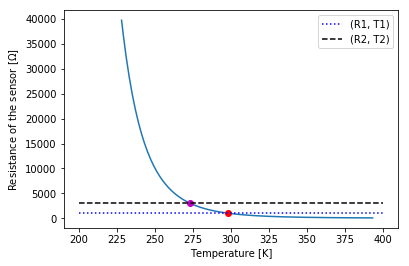

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp
%matplotlib inline

#Calculate the value of beta and Ro 
T0 = 293.15;
K=(1/273.15-1/298.15);
beta= log(3000/1000)/K;
R0=1000/exp(beta*((1/298.15)-(1/293.15)));

print("The result of constant Beta is: %2.3f" % (beta));
print("The result of Ro is: %2.3f" % (R0));

#Set the R(T) equation 
T= np.arange(start = -45, stop = 121, step = 1)+273.15;
R_T= R0 * np.exp(beta*((1/T)-(1/T0)));

#Plot the equation and given points
plt.plot(T,R_T,T[45],R_T[45],'mo',T[70],R_T[70],'ro');
plt.plot([200,400],[1000,1000],'b:',label='(R1, T1)')
plt.plot([200,400],[3000,3000],'k--',label='(R2, T2)');
plt.ylabel('Resistance of the sensor [$\Omega$]')
plt.xlabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()

The previous plot, show us the nonlinear behaviour of the sensor and the given points.

b. Approximate the transfer function as a straight line connecting the end points and calculate the maximum error expected as a percentage of full scale.

The equation for the straight line is:
$R(T)_{linear} = aT +b$

The coefficients are a = -240.632 and b = 94659.458


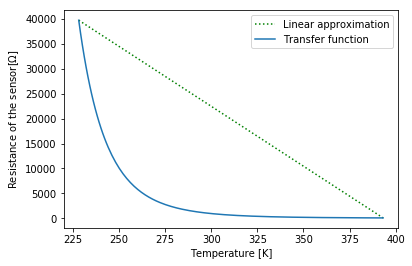

In [52]:
#We approximate it with a polynomial with 1-degree order
coef = np.polyfit(np.array([T[0],T[-1]]),np.array([R_T[0],R_T[-1]]),1)

print('The coefficients are a = %2.3f and b = %2.3f' % (coef[0], coef[1]))

#Line equation with coefficients
R_T_linear = coef[0]*T+coef[1]

#Plot it
plt.plot(T,R_T_linear,'g:',label='Linear approximation')
plt.plot(T,R_T,label='Transfer function')
plt.ylabel('Resistance of the sensor[$\Omega$]')
plt.xlabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()

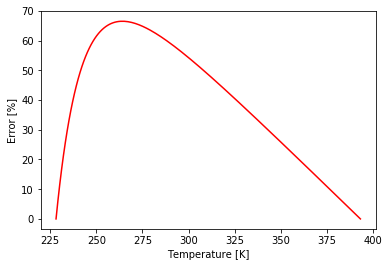

The maximum error expected as a percentage of full scale is = 66.513 %


In [46]:
#Graph with Full scale
FS = np.abs(np.max(R_T)-np.min(R_T))

error_fs = (np.abs(R_T-R_T_linear)/FS)*100;

plt.ylabel('Error [%]')
plt.plot(T,error_fs,'r')
plt.xlabel('Temperature [K]')
plt.show()
print('The maximum error expected as a percentage of full scale is = %2.3f %%' % (np.max(error_fs)))

c. Approximate the transfer function as a linear least squares approximation and calculate the maximum error expected as a percentage of full scale.

Now, we compared both graphs, one with the plot of the transfer function, and the other with the least squares fit approximation that we calculate with the command 'Polyfit', but, this time with all the transfer function.

The coefficients are a = -114.433 and b = 39697.024


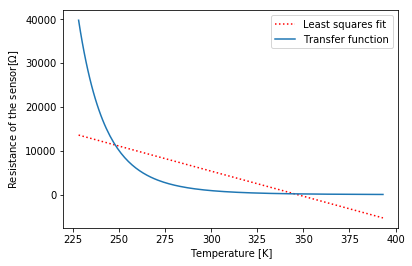

In [59]:
#Approximate all the transfer function
#1-degree polynomial
coef_2 = np.polyfit(T,R_T,1)

print('The coefficients are a = %2.3f and b = %2.3f' % (coef_2[0], coef_2[1]))

#Line equation with coefficients
R_T_le = coef_2[0]*T+coef_2[1]

#Plot it
plt.plot(T,R_T_le,'r:',label='Least squares fit')
plt.plot(T,R_T,label='Transfer function')
plt.ylabel('Resistance of the sensor[$\Omega$]')
plt.xlabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()

Finally, we calculate the error between all the points on the transfer function and the linear approximation that we calculate with least squares fit.

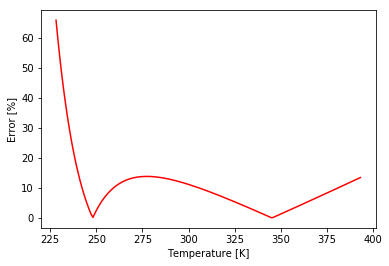

The maximum error expected as a percentage of full scale is = 65.913 %


In [60]:
#Graph with Full scale

error_lsf = (np.abs(R_T-R_T_le)/FS)*100;

plt.ylabel('Error [%]')
plt.plot(T,error_lsf,'r')
plt.xlabel('Temperature [K]')
plt.show()
print('The maximum error expected as a percentage of full scale is = %3.3f %%' % (np.max(error_lsf)))

**Authors:**

Yithzak Alarcón - T00045029

Angie Vitola - T00045045